# Problem Set 4

This is my problem set 4 assignment.

## Dataset Desription

In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

The dataset that I chose was about the rainfall patterns in various parts of Australia on given days and whether or not there was rainfall on the following day. I thought that this would be a good dataset to work with because it is a straightforward classification task that has practical implications in the real world. This might not necessarily be the most pertinent dataset for our purposes (being in Seattle and everything), but I think that at the very least, this dataset is a good example of how something like this *could* be a useful application of machine learning anywhere in the world. It is also significantly less depressing than the other datasets I was considering to use (like classifying the outcomes of COVID patients). For the purposes of this project, I will work with only data from Sydney, even though the dataset has access to various cities across Australia, as it makes the most sense to narrow the classification task to a smaller area. There were 3344 data points for Sydney in this dataset.

Some of the features of the dataset are as follows:

* MinTemp (float): The low tempurature of the day in Celsius
* MaxTemp (float): The high tempurature of the day in Celcius
* Rainfall (float): The amount of rainfall recorded during the day in millimeters
* Sunshine (int): The number of hours of bright sunshine in the day
* Temp9am (float): The tempurature at 9am in Celcius
* Temp3pm (float): The tempurature at 3pm in Celcius
* RainToday (character): Whether or not there was measurable rain on the current day
* (OUTPUT) RainTomorrow (character): Whether or not there was measureable rain on the following day

The full list of features can be found [here](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package), where this dataset was also found and downloaded.

## Research Question

The research question is as follows: **Can we predict whether or not there was measureable rain the following day based on information about the variables of the current day in Sydney?**

I plan to use K-Nearest-Neighbors to predict this.

### Why This Algorithm?

I chose to use KNN because it allows for classification problems like this. The feature-to-data ratio is not ideal, as KNN suffers from the curse of dimensionality, but this can be recfitied by reducing the number of features, which in this case, we will do through feature selection.

## Running the Model

We start by importing the data that we need to work with, as well as filtering the data down to the area of focus.

In [3]:
# import and view the data
australia_weather = pd.read_csv('weatherAUS.csv')
australia_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# filter the data to only include Sydney data and view it
sydney_weather = australia_weather[australia_weather.Location == 'Sydney']
sydney_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [5]:
# view the shape of the data we're working with
sydney_weather.shape

(3344, 23)

We can also view the number of NA values in the dataset. This will help us in the preliminary feature selection.

In [6]:
# view the NaN values by column
sydney_weather.isna().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
dtype: int64

We can see that `WindGustDir`, `WindGustSpeed`, `Cloud9am`, and `Cloud3pm` all have high rates of NA values, so we can strongly consider to cut them during feature selection.

In [7]:
# drop the columns that we want to remove with high numbers of NaN values
sydney_weather = sydney_weather.drop(['WindGustDir', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm'], axis=1)
sydney_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

We also want to drop the columns that have `RainTomorrow` as NA values, as these days will not help us in predicting if there was rain tomorrow.

In [8]:
# remove the rows where we don't have the RainTomorrow answer
sydney_weather = sydney_weather[sydney_weather.RainTomorrow.notna()]
sydney_weather.isna().sum()

Date             0
Location         0
MinTemp          3
MaxTemp          2
Rainfall         6
Evaporation     51
Sunshine        16
WindSpeed9am    26
WindSpeed3pm    25
Humidity9am     14
Humidity3pm     13
Pressure9am     20
Pressure3pm     19
Temp9am          4
Temp3pm          4
RainToday        6
RainTomorrow     0
dtype: int64

In [9]:
sydney_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,17.0,20.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,9.0,13.0,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,17.0,2.0,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,22.0,20.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,11.0,6.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes


For the purposes of our dataset, we will also change the `Yes` and `No` values in RainToday and RainTomorrow to be 1 and 0, with 0 representing `No` and 1 representing `Yes`.

In [10]:
# replace 'yes' and 'no' encodings for RainToday and RainTomorrow to 1 and 0 respectively
sydney_weather = sydney_weather.replace({'Yes': 1, 'No': 0})
sydney_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,17.0,20.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1.0,1
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,9.0,13.0,83.0,73.0,1017.9,1016.4,22.4,24.8,1.0,1
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,17.0,2.0,88.0,86.0,1016.7,1015.6,23.5,23.0,1.0,1
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,22.0,20.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1.0,1
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,11.0,6.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1.0,1


We also still have some NA data in the dataset. For these values, we will replace them with the **average values of that column**. This is not a perfect solution, but in this case it is better to do this than to replace these values with 0 (as this is likely further from the "truth" than the average value) and it would be a significant portion of our data to simply ignore.

In [11]:
# for each NaN value in each of the columns, replace it with the average
# value of that column
for column in sydney_weather.columns[2:16]:
    mean = sydney_weather[column].mean(skipna=True)
    sydney_weather[column] = sydney_weather[column].replace(np.NaN, mean)
    
sydney_weather.isna().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

We also know that KNN is an algorithm that suffers from the curse of dimensionality, which means that including too many feature will have a strong negative affect on how the model will perform, especially with our number of data points. We will parse down our feature list to a much smaller list, chosen somewhat arbitrarily but also using intuition on what might cause rainfall the following day.

In [12]:
# create a new dataframe with an extremely parsed down feature list
sydney_weather_parsed = sydney_weather[['MinTemp', 'MaxTemp', 'Rainfall', 'RainToday', 'RainTomorrow']]
sydney_weather_parsed.head()

,MinTemp,MaxTemp,Rainfall,RainToday,RainTomorrow
30176,19.5,22.4,15.6,1.0,1
30177,19.5,25.6,6.0,1.0,1
30178,21.6,24.5,6.6,1.0,1
30179,20.2,22.8,18.8,1.0,1
30180,19.7,25.7,77.4,1.0,1


And now we can separate our data into the train/test split.

In [13]:
# create the test/train split with the data
X = sydney_weather_parsed.iloc[:, 0:-1]
y = sydney_weather_parsed.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

And with KNN, we also have to scale our features.

In [14]:
# use StandardScaler() to scale the data before running KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

And finally, we can create our classifier. We will start with K = 5 as an arbitrary starting point. We will be changing these parameters in the following section.

In [15]:
# create our classifier and train it on the training data
classifier_5 = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'euclidean')
classifier_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

By running the classifier on the testing data, we can see that we get some predictions. We will see how accurate (or not accurate) these predictions are in the following sections.

In [16]:
# create a prediction matrix with the trained classifier
y_pred = classifier_5.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

## Changing Parameters

For the purposes of this project, we will choose to change the K values of the classifiers. For the following models, we will run them with K values of 3, 7, and 9.

In [19]:
# create a classifier and train it on the dataset for each K value of 3, 7, and 9
# then for each of those, create a prediction matrix
classifier_3 = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
classifier_3.fit(X_train, y_train)
y_pred_3 = classifier_3.predict(X_test)

classifier_7 = KNeighborsClassifier(n_neighbors = 7, p = 2, metric = 'euclidean')
classifier_7.fit(X_train, y_train)
y_pred_7 = classifier_7.predict(X_test)

classifier_9 = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier_9.fit(X_train, y_train)
y_pred_9 = classifier_9.predict(X_test)

## Accuracy of Model

To report the accuracy of each of these models, we will report the confusion matrix and the F1 score. Because of a class imbalance problem, reporting true accuracy likely won't lead to meaningful analysis of the accuracies.

In [20]:
# print the confusion matrix and F1 score of the model where K = 5
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[440  53]
 [111  64]]
0.43835616438356173


In [21]:
# print the confusion matrix and F1 score of the model where K = 3
print(confusion_matrix(y_test, y_pred_3))
print(f1_score(y_test, y_pred_3))

[[419  74]
 [107  68]]
0.4290220820189274


In [22]:
# print the confusion matrix and F1 score of the model where K = 7
print(confusion_matrix(y_test, y_pred_7))
print(f1_score(y_test, y_pred_7))

[[454  39]
 [112  63]]
0.45487364620938625


In [23]:
# print the confusion matrix and F1 score of the model where K = 9
print(confusion_matrix(y_test, y_pred_9))
print(f1_score(y_test, y_pred_9))

[[452  41]
 [110  65]]
0.4626334519572954


We can see that these confusion matrices and F1 scores are not particularly impressive. Out of these models, the best performing was the one with K = 9, but even then there were high numbers of false positive (in this case, the left column and lower row is a negative result while the right column and upper row are positive results), meaning that the model had a tough time accurately predicting days where rain did not fall. This is likely due to the information lost in the somewhat arbitrary feature selection phase. We can quickly try to replicate these models with more features to see if this improves the performance of the models.

In [24]:
# create a new dataframe with more features than the original
sydney_weather_parsed_v2 = sydney_weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
                                        'Humidity3pm', 'Pressure3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']]
sydney_weather_parsed_v2.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
30176,19.5,22.4,15.6,0.0,84.0,1017.4,20.9,1.0,1
30177,19.5,25.6,6.0,2.7,73.0,1016.4,24.8,1.0,1
30178,21.6,24.5,6.6,0.1,86.0,1015.6,23.0,1.0,1
30179,20.2,22.8,18.8,0.0,90.0,1011.8,20.9,1.0,1
30180,19.7,25.7,77.4,0.0,74.0,1004.8,25.5,1.0,1


In [25]:
# create a new test/train split with the new data
X = sydney_weather_parsed_v2.iloc[:, 0:-1]
y = sydney_weather_parsed_v2.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

In [26]:
# scale the new dataset with StandardScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# create a classifier and train it on the new dataset for each K value of 3, 7, and 9
# then for each of those, create a prediction matrix
classifier_3_v2 = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
classifier_3_v2.fit(X_train, y_train)
y_pred_3_v2 = classifier_3_v2.predict(X_test)

classifier_5_v2 = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'euclidean')
classifier_5_v2.fit(X_train, y_train)
y_pred_5_v2 = classifier_5_v2.predict(X_test)

classifier_7_v2 = KNeighborsClassifier(n_neighbors = 7, p = 2, metric = 'euclidean')
classifier_7_v2.fit(X_train, y_train)
y_pred_7_v2 = classifier_7_v2.predict(X_test)

classifier_9_v2 = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier_9_v2.fit(X_train, y_train)
y_pred_9_v2 = classifier_9_v2.predict(X_test)

In [28]:
# print the confusion matrices and F1 scores for each of the new test sets that 
# we created with the new data
print(confusion_matrix(y_test, y_pred_3_v2))
print(f1_score(y_test, y_pred_3_v2))

print(confusion_matrix(y_test, y_pred_5_v2))
print(f1_score(y_test, y_pred_5_v2))

print(confusion_matrix(y_test, y_pred_7_v2))
print(f1_score(y_test, y_pred_7_v2))

print(confusion_matrix(y_test, y_pred_9_v2))
print(f1_score(y_test, y_pred_9_v2))

[[439  54]
 [ 82  93]]
0.577639751552795
[[450  43]
 [ 83  92]]
0.5935483870967742
[[457  36]
 [ 82  93]]
0.6118421052631579
[[459  34]
 [ 85  90]]
0.6020066889632107


We can actually see a meaningful improvement with a larger number of features. It seems like the curse of dimensionality doesn't take strong effect until much larger numbers of features are included. We can see that the F1 score peaks around K = 7, and that False Positive results are much lower across the board.

## Visualization

Creating a visualization that represents the findings of KNN is a little bit difficult, especially with larger feature sets, because it is working in dimensions past what we are able to visualize as humans. For the purposes of this visualization, I will simplify the model to only include 2 features, so that we will be able to visualize what the KNN model is doing at a lower level.

Text(0.5, 1.0, 'Rainfall vs Humidity at 3pm')

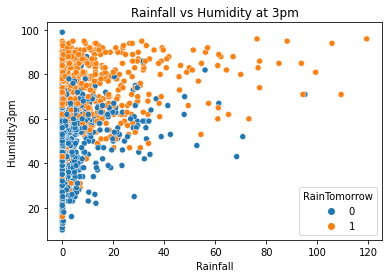

In [29]:
# create a scatterplot to visualize what KNN is doing in 2 dimensions
sns.scatterplot(data = sydney_weather, x = 'Rainfall', y = 'Humidity3pm', hue = 'RainTomorrow')
plt.title('Rainfall vs Humidity at 3pm')

In this example, when trying to predict if a there was going to be rain following a particular day, we would find the Rainfall levels and Humidity at 3pm of that day, and find the K nearest points. Out of those K nearest neighbors, they would "vote" with their own outcomes. If there were more blue dots (no rain) near the day we're trying to predict, then we would predict that there would be no rain the following day, and vice versa with orange dots (rain).

We can also visualize our findings by creating visualizations for the confusion matrices of our outcomes.

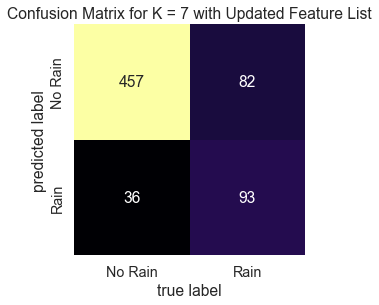

In [30]:
# create a confusion matrix with scaling colors for the model
# where K = 7 with the updated feature list
sns.set()

cm = confusion_matrix(y_test, y_pred_7_v2)
sns.set(font_scale=1.3)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", 
            xticklabels=['No Rain','Rain'],yticklabels=['No Rain','Rain']
            )

# add the axes labels and titles
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix for K = 7 with Updated Feature List')
plt.savefig('nbcm5')
plt.show();

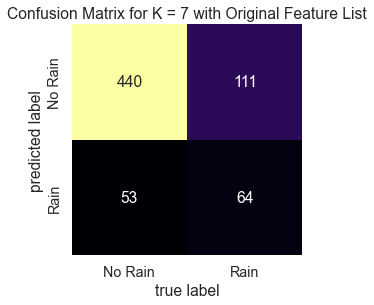

In [31]:
# create a confusion matrix with scaling colors for the model
# where K = 7 with the original feature list
sns.set()

cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.3)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", 
            xticklabels=['No Rain','Rain'],yticklabels=['No Rain','Rain']
            )
# add the axes labels and titles
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix for K = 7 with Original Feature List')
plt.savefig('nbcm5')
plt.show();

From these, we can see that the K = 7 model with the updated feature list had more true negatives and true positives, and fewer false negatives and false positives. This indicates that the updated feature list creates better performing models.

We can also plot the F1 scores of the different models.

In [32]:
# create a dataframe with the model name and F1 scores for that model as the two columns
f1_compare = [['3 Neighbors', f1_score(y_test, y_pred_3)], ['5 Neighbors', f1_score(y_test, y_pred)], 
              ['7 Neighbors', f1_score(y_test, y_pred_7)], ['9 Neighbors', f1_score(y_test, y_pred_9)], 
              ['3 Neighbors V2', f1_score(y_test, y_pred_3_v2)], ['5 Neighbors V2', f1_score(y_test, y_pred_5_v2)], 
              ['7 Neighbors V2', f1_score(y_test, y_pred_7_v2)], ['9 Neighbors V2', f1_score(y_test, y_pred_9_v2)]]
f1_df = pd.DataFrame(f1_compare, columns = ['Model', 'F1 Score'])
f1_df

,Model,F1 Score
0,3 Neighbors,0.429022
1,5 Neighbors,0.438356
2,7 Neighbors,0.454874
3,9 Neighbors,0.462633
4,3 Neighbors V2,0.577640
5,5 Neighbors V2,0.593548
6,7 Neighbors V2,0.611842
7,9 Neighbors V2,0.602007


Text(0.5, 1.0, 'Model Parameter Version vs F1 Score')

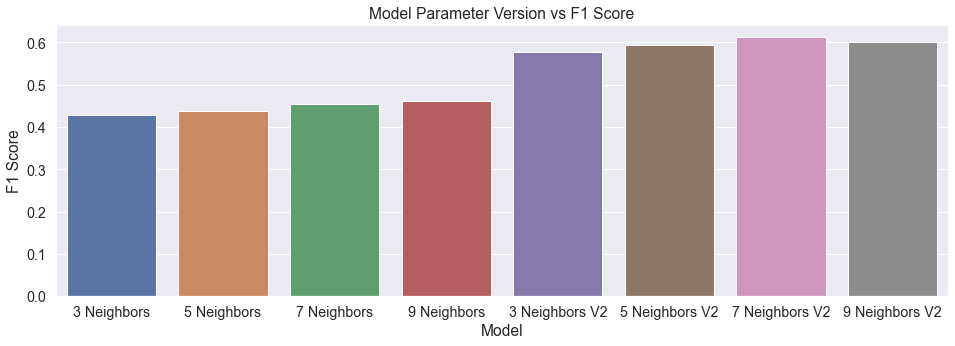

In [33]:
# plot the F1 scores for each model on a bar chart
plt.figure(figsize=(16, 5))
sns.barplot(data=f1_df, x = 'Model', y = 'F1 Score')
plt.title('Model Parameter Version vs F1 Score')

And from here, we can see that the updated feature list performed better than the original feature list, and that there tends to be a slight performance peak around 7 neighbors for this data.

## Challenges

The first challenge that I ran into was finding a suitable dataset for this type of problem. Many datasets didn't have the data necessary to answer a suitable research question for a variety of reasons, whether it be because the dataset wasn't formatted correctly or because the dataset simply didn't have enough data. In addition, this highlights an overall challenge that I think is felt by many in the field. We will not always have the luxury of simply searching for another dataset to answer a different research question if the data doesn't fit our liking. Sometimes we have to just work with what information we have.

Another challenge I ran into was the challenge of feature selection, which is another common problem when creating models, especially KNN. I don't really have any domain expertise, nor do I have access to anyone who does, so the feature selection portion of the creation of these models were more or less trial-and-error. The dataset, the model, and the research question all contributed to this problem. The dataset because of the subject matter, the model because of the requirement of feature selection, and the research question also because of the subject matter. In industry, I would try my best to overcome this challenge by finding subject-matter experts to help guide in the feature selection process, and if that wasn't possible, I would spend more time researching Australian weather patterns or learning more about meteorology in general.

## Benefits and Harms
    
One benefit to this model is the obvious benefit of possibly being able to predict the weather for the following day with a high degree of accuracy. This can be very beneficial in that you can plan your day ahead of time. Another benefit is that it could influence and improve future data collection and models. For example, if it was found that adding a feature like Evaporation to the model greatly improved it, it could indicate to future meteorologists that they should be especially focused when collecting Evaporation data.

One harm is that models like this could be used in contexts other than which they were intended for. For example, this model is not likely to be very accurate when predicting the weather in Seattle. This might not seem like a super impactful harm, but it can be, depending on the use case, which also ties into the second harm. The second harm of this model is that people can sometimes build a reliance on predictive models like this. Even something as seemingly innocuous as the weather and rainfall can have large negative impacts on people's lives, especially if they heavily depend on models like this. For example, say someone had a big job interview the following day, and this model predicted "no rain," so they hung their clothes outside to dry. If the model ends up being wrong, this can have negative consequences on that person. This might seem like a contrived or even silly example, but depending on the scale of use of this type of model, being wrong can have negative effects (however inconsequential) for large numbers of people.

## Future Research Question

One future research question might be to investigate which features contribute the most predictive power in figuring out if it will rain on the following day. KNN isn't really designed to answer this type of question, so it would likely have to be done with a different algorithm. This question is important because it can retroactively improve models like the one created here (by choosing the optimal features rather than trial-and-error) and because, as noted above, it can help guide future research in the meteorological community.